# Assignment 1  - IMPORTANT to read the marking guide when im finished as it does contain interesting things that I have to include but havent yet

## Question 1  Drastically edit variable names in task 3 and 4 before submitting

In this notebook we will be investigating the population relationship between rabbits and foxes. Some basic parameters are:
- The only food for foxes is rabbits
- There is unlimited growth for both populations
- This is a closed system - No foxes or rabbits are added or subtract by outside influences

In [499]:
# Importing what we will need to answer this question
import matplotlib.pyplot as plt
import numpy as np

### Task 1

In [467]:
# First we initialise our animal population values
fox_population = 35000
rabbit_population = 70000

### Task 2

In [470]:
# Next we initialise values needed for our future computations. These have been 
# provided for us and have been described as reproduction and predation rates.
c = 0.000005
d = 0.3
f = 0.5
g = 0.00001

### Task 3

In [473]:
# First we are defining how many time steps or iterations we will be observing
time_steps = 50
# Here we are creating lists to store our animal populations over time
# TODO Write better list variable names
fox_ls = []
rabbit_ls = []

### Task 4 - TODO, Add conditional to check for 0 population

In [476]:
# TODO - Consider clearing the list as the first thing this cell does every time to stop the data from piling up
# TODO - Better yet, just add task 1 and 3s code here so that it rewrites itself everytime this cell is ran
# TODO - tidy up everything



# Iterating over all time
for step in range(time_steps):
    # Generating new population values using a pre given sum and the supplied variables from tasks 1 and 2
    new_fox_population = (((c*rabbit_population)-d)*fox_population)+fox_population
    new_rabbit_population = ((f-(g*fox_population))*rabbit_population)+rabbit_population

    # Using this conditional to make sure we dont include negative population numbers
    # As you can't have a real negative population.
    if new_rabbit_population < 0:
        new_rabbit_population = 0
    elif new_fox_population < 0:
        new_fox_population = 0
    
    # Appending new population numbers to our above made lists
    fox_ls.append(new_fox_population)
    rabbit_ls.append(new_rabbit_population)

    # Reassigning our rabbit and fox population variables with the newly calculated rabbit and fox populations
    fox_population = new_fox_population
    rabbit_population = new_rabbit_population

# print(len(rabbit_ls))
# print(len(fox_ls))

### Task 5

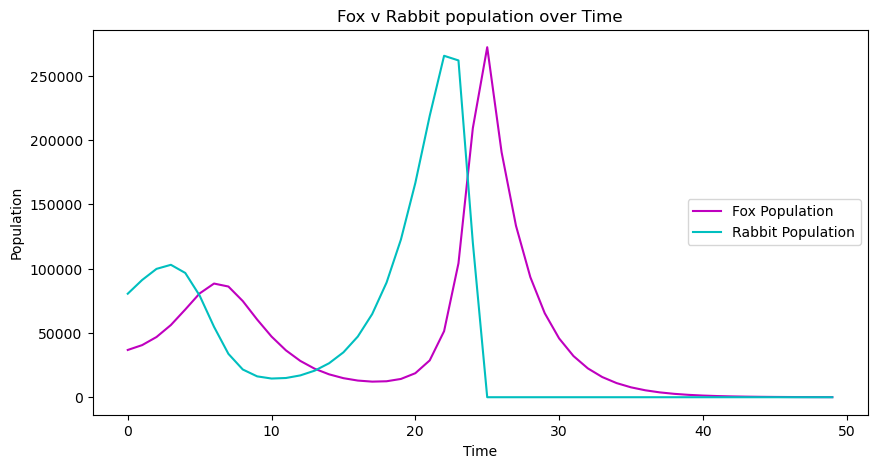

In [665]:
# TODO - set the x lim so that I can sit the legend off to the side
# TODO - Find a better way to add the labels to the legend
# TODO - Add text on the chart for local max/min/cross overs or any other interesting points
# TODO - Add a style to the chart
# TODO - Tidy up everything

fig, ax=plt.subplots(figsize=(10,5))

# Create a list of each number in our time series for plotting
# Using the length of our population lists for the upper bounds
# of this list
time = np.arange(0, len(fox_ls))

# Plot the fox population
fox = ax.plot(time,fox_ls,"m", label="Fox population")

# Plot the fox population
rabbit = ax.plot(time,rabbit_ls,"c", label="Fox population")

# Add a title and labels
ax.set_title("Fox v Rabbit population over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Population", rotation=90)

# ax.set_xlim([14500])
ax.legend(["Fox Population", "Rabbit Population"], loc="right")

plt.show()

### Analysis of the chart

TODO - Write analysis

## Question 2

In this question we are looking at some historical data of tempreatures and rainfall to try gain insights into the global issue of climate change. <br>
In the following sections we will be:
- Calculating some basic statistics from out data
- plotting our data  over time to real any patterns
- Calculate moving averages of the data
- Check the correlation between rainfall and tempreature and plotting our results
- Locating in our data significant points such as their highest and lowest points

Lets get started

In [504]:
# First we start with importing all we will need to perform what we want to perform
import pandas as pd

### Task 1. Data Cleaning

In [568]:
# Now we load in our dataset as a pandas dataframe
climate_data = pd.read_csv("climate_data.csv")

Check out data to see what we are working with

In [571]:
climate_data.head()

,Date,Temperature,Precipitation
0,1/01/2020,13.734542,5.600418
1,2/01/2020,17.017536,3.021641
2,3/01/2020,10.179562,3.277406
3,4/01/2020,22.943676,1.337302
4,5/01/2020,23.786589,2.016395


In [573]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           731 non-null    object 
 1   Temperature    731 non-null    float64
 2   Precipitation  689 non-null    float64
dtypes: float64(2), object(1)
memory usage: 17.3+ KB


As we see from our info we are working with a data set with three column: Date, Tempreature and precipitation. <br>
It looks like we have all values for date and tempreature but we are clealy missing some Precipitation data. <br>
We have a few options on what we can replace it with. Since our data contains dates for two straight years, we <br>
could take a data point from the same time either in the next or previous year. This could prove to be problematic <br>
as there is a chance we happen to have missing data on the same day for both years, or perhaps there is an extreme <br>
weather event on one of the days leading us to be doubling the occurence of said event. Secondly we could just put <br>
zero in our missing values, but this could also possibly skew the data as potentially there is a period of record <br>
rainfall and we just happen to throw in a 0 in middle of it. For these reason, when looking at this dataset, we will <br>
choose to replace missing values with the average/mean.

In [612]:
# TODO - think of filling the missing data with an average of just the month more more accuracy

# First we get the mean of the precipitation column as that is the column we have identified with missing values
rain_mean = climate_data.Precipitation.mean()

# Fill the nan values with the mean and reassign our data
climate_data = climate_data.fillna(rain_mean)

# Check to make sure it worked
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           731 non-null    object 
 1   Temperature    731 non-null    float64
 2   Precipitation  731 non-null    float64
dtypes: float64(2), object(1)
memory usage: 17.3+ KB


### Task 2. Descriptive Statistics

In [641]:
# Write a quick function to calculate the range of our series
def calc_range(dataset):
    return max(dataset) - min(dataset)

In [645]:
# We will print out the medians of our dataset using the pandas .median
print(f"The median temperature is: {climate_data.Temperature.median()}")
print(f"The median Precipitation is: {climate_data.Precipitation.median()}")

# Print out our datas ranges
print(f"The range of the Temperature is: {calc_range(climate_data.Temperature)}")
print(f"The range of the Percipitation is: {calc_range(climate_data.Precipitation)}")

# And now we print out some other interesting stats including mean and std 
climate_data.describe()

The median temperature is: 15.076811546942537
The median Precipitation is: 3.037046122
The range of the Temperature is: 36.39063048944684
The range of the Percipitation is: 9.869751556


,Temperature,Precipitation
count,731.000000,731.000000
mean,15.122898,3.190701
std,5.112888,1.787162
min,-2.825812,0.011537
25%,11.592260,1.905783
50%,15.076812,3.037046
75%,18.133100,4.359504
max,33.564819,9.881288


### Task 3. Time Series Analysis

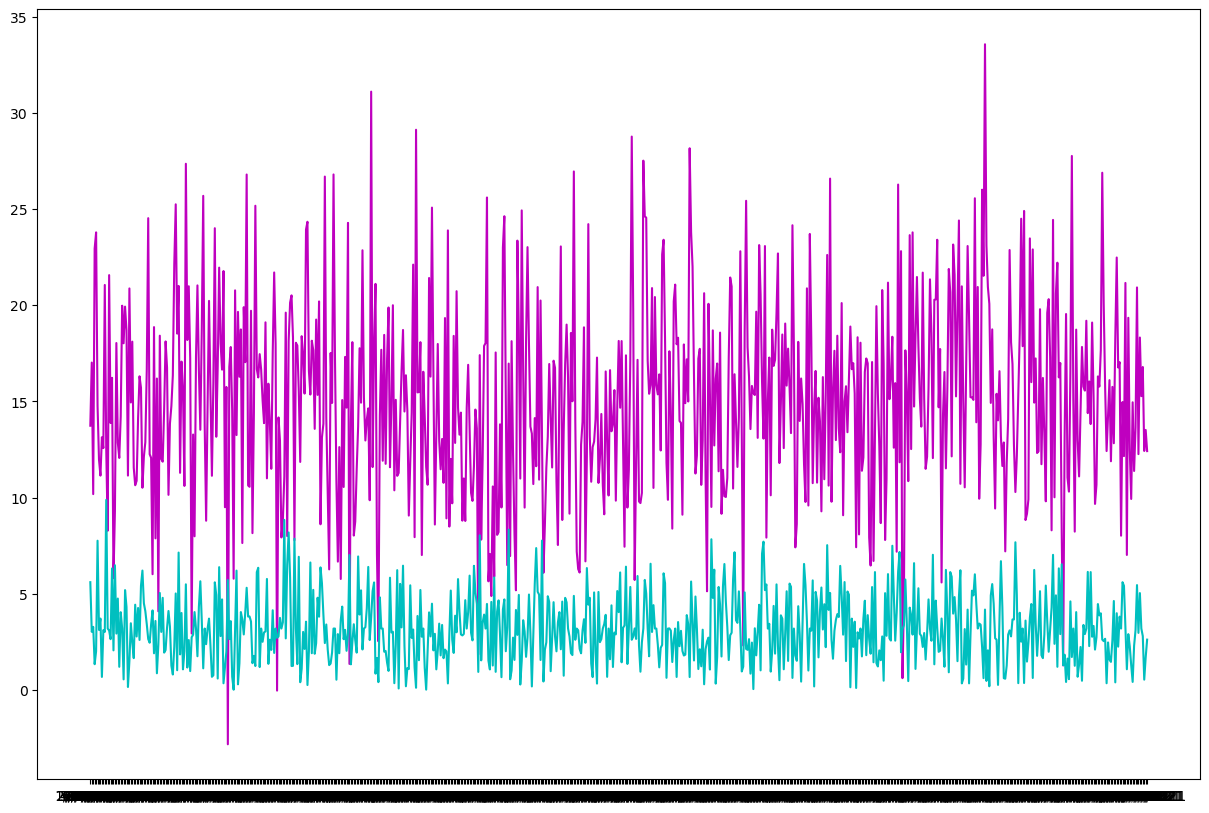

In [663]:
fig, ax=plt.subplots(figsize=(15,10))


ax.plot(climate_data.Date, climate_data.Temperature, "m")
ax.plot(climate_data.Date, climate_data.Precipitation, "c")

### 5. Extreme Events Analysis

618    33.564819
194    31.102864
225    29.121004
374    28.766471
414    28.158733
678    27.758364
382    27.514553
66     27.352771
334    26.953047
699    26.886629
Name: Temperature, dtype: float64
95    -2.825812
129   -0.035139
561    0.612231
672    1.273611
179    1.350806
268    1.846347
451    2.308593
199    2.527515
70     2.932382
47     4.085563
Name: Temperature, dtype: float64
11     9.881288
134    8.838731
289    8.333454
137    8.186214
269    8.037867
141    7.860731
429    7.832072
312    7.763547
5      7.756759
465    7.707028
Name: Precipitation, dtype: float64
99     0.011537
232    0.014629
458    0.043874
213    0.075611
529    0.101518
225    0.112118
525    0.138287
26     0.152103
305    0.180775
500    0.181362
Name: Precipitation, dtype: float64


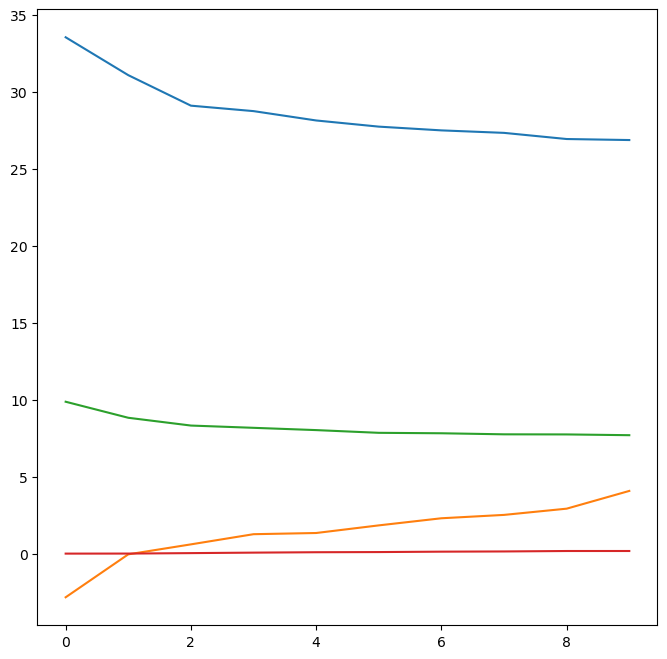

In [716]:
# TODO - Everything, this is a terribly clunking implementation of this question

# Assign our temperature data to a variable
temp = climate_data.Temperature

# Use pandas sort_values function to sort the values
highest_temp = temp.sort_values(ascending=False)
lowest_temp = temp.sort_values()

# Repeat the same process for Precipitation
rain = climate_data.Precipitation
highest_rain = rain.sort_values(ascending=False)
lowest_rain = rain.sort_values()

print(highest_temp[:10])
print(lowest_temp[:10])

print(highest_rain[:10])
print(lowest_rain[:10])

fig, ax=plt.subplots(figsize=(8,8))

time = np.arange(0,10)

ax.plot(time, highest_temp[:10])
ax.plot(time, lowest_temp[:10])
ax.plot(time, highest_rain[:10])
ax.plot(time, lowest_rain[:10])